In [ ]:
# !pip install opencv-python

In [1]:
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
import os

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the image
image = cv2.imread('/content/drive/MyDrive/Face Recognition/latest.jfif')
# Convert the image to RGB (OpenCV loads images in BGR format by default)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#print(image_rgb)

In [ ]:
# Load the pre-trained Haar Cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +
                                     'haarcascade_frontalface_default.xml')

In [ ]:
# Detect faces in the image
faces = face_cascade.detectMultiScale(image_rgb, scaleFactor = 1.1,
                                      minNeighbors = 5, minSize = (30, 30))
#print(faces)
# Draw bounding boxes around detected faces
for (x, y, w, h) in faces:
    cv2.rectangle(image_rgb, (x, y), (x + w, y + h), (255, 0, 0), 2)


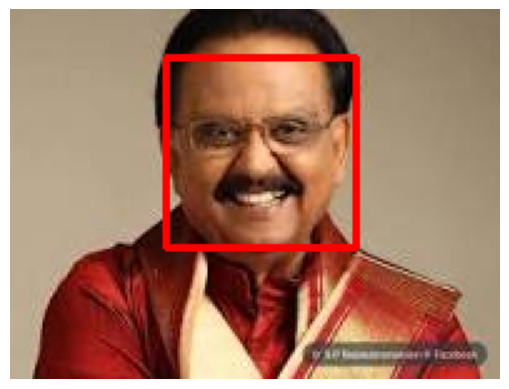

In [ ]:
# Display the output image
plt.imshow(image_rgb)
plt.axis('off')  # Hide axes
plt.show()

In [ ]:
import os
import cv2
import numpy as np
import ipywidgets as widgets
from IPython.display import display
from google.colab import drive

In [ ]:
# Mount Google Drive
#drive.mount('/content/drive')

# Path to Google Drive directory
drive_path = '/content/drive/My Drive/Face Recognition'

In [ ]:
# Function to create a file picker
def create_file_picker(directory):
    files = [f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))]
    file_picker = widgets.Dropdown(
        options=files,
        description='Select file:',
    )
    return file_picker

# Create a file picker widget
file_picker = create_file_picker(drive_path)
display(file_picker)

Dropdown(description='Select file:', options=('latest.jfif', 'input.mp4'), value='latest.jfif')

In [ ]:
# Function to process the selected video file
def process_video(file_name):
    video_path = os.path.join(drive_path, file_name)

    # Load the Haar cascade for face detection
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +
                                         'haarcascade_frontalface_default.xml')

    # Open the video file
    cap = cv2.VideoCapture(video_path)

    # Create a VideoWriter object to save the output
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out = cv2.VideoWriter('output.mp4', fourcc, 20.0, (int(cap.get(3)), int(cap.get(4))))

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Convert the frame to grayscale
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Detect faces
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5,
                                              minSize=(30, 30))

        # Draw bounding boxes around detected faces
        for (x, y, w, h) in faces:
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

        # Write the frame with detected faces to the output video
        out.write(frame)

    # Release video objects
    cap.release()
    out.release()

In [ ]:
# Use an interactive widget to process the selected file
def on_file_selected(change):
    if change['new']:
        process_video(change['new'])

In [ ]:
file_picker.observe(on_file_selected, names='value')

In [ ]:
from google.colab import files
files.download('output.mp4')

FileNotFoundError: Cannot find file: output.mp4